In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

%matplotlib inline

In [50]:
df = pd.read_csv('./CarRentalDataCleaned.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
df.describe()

,rating,renterTripsTaken,rate.daily,vehicle.age,recommended,fuelType_cat,vehicle.make_cat,vehicle.model_cat,vehicle.type_cat
count,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000
mean,4.927152,36.717073,91.035460,5.701313,0.525141,1.916510,27.336398,244.021388,0.742026
std,0.131682,42.534036,90.091022,3.919257,0.499414,0.440459,16.534081,140.816378,1.022205
min,4.000000,1.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,8.000000,44.000000,3.000000,0.000000,2.000000,12.000000,120.000000,0.000000
50%,5.000000,21.000000,68.000000,5.000000,1.000000,2.000000,24.000000,271.000000,0.000000
75%,5.000000,50.000000,109.000000,8.000000,1.000000,2.000000,47.000000,352.000000,2.000000
max,5.000000,395.000000,1500.000000,66.000000,1.000000,3.000000,53.000000,501.000000,4.000000


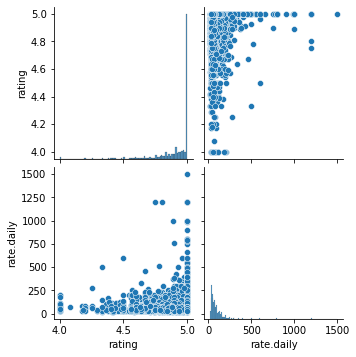

In [51]:
plot = sns.pairplot(df[['rating', 'rate.daily']])



In [52]:
# Using:   age, fuelType, make, type
# X_train, X_test, y_train, y_test = train_test_split(df.drop(['rating', 'renterTripsTaken', 'recommended'], axis=1), df['recommended'])
X_train, X_test, y_train, y_test = train_test_split(df[['rate.daily', 'vehicle.age', 'fuelType_cat', 'vehicle.make_cat', 'vehicle.model_cat', 'vehicle.type_cat']], df['recommended'])

In [53]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
print(X_train.head())

      rate.daily  vehicle.age  fuelType_cat  vehicle.make_cat  \
4600        45.0          3.0             2                19   
4165        56.0          6.0             2                38   
964         55.0          9.0             2                50   
1514        26.0         10.0             3                50   
3585        72.0          8.0             2                34   

      vehicle.model_cat  vehicle.type_cat  
4600                387                 2  
4165                187                 3  
964                 396                 1  
1514                323                 0  
3585                267                 2  


In [54]:
LogReg.predict(np.array([[10000, 3, 3, 50,342, 2]]))[0]

1

In [55]:
LogReg.score(X_test, y_test)

0.5881470367591898